In [1]:
%matplotlib inline
import os
import numpy as np
import pynbody
from pynbody.plot import sph
import matplotlib.pylab as plt

from snap_io import load_moria_sim_and_kicked, load_moria, load_kicked, load_sim

In [2]:
SIMNUMBER = "69002_p200.0_a600.0_r600.0_c8.15"
kicked=True

In [3]:
resolution = 500
width = 10 # kpc
vmax=2e-1
vmin=5e-4;

In [4]:
# # pynbody.analysis.angmom.faceon(sim)

In [5]:
# fig, ax = plt.subplots(figsize=(10,10))
# sph.image(sim.g, subplot=ax, qty="rho", resolution=500, units="g cm^-3",
#           width=10, log=False);
# time = '$t={%5.2f}$ Gyr' % sim.properties['time'].in_units("Gyr")
# ax.set_title(time, fontsize=12)

In [6]:
def gas_image(sim, **kwargs):
    sim.properties.pop('boxsize', None)
    sim.g['smooth'] /= 2
    pynbody.analysis.halo.center(sim, shrink_factor=0.9)
    try:
        img = sph.image(sim.g, qty="rho", units="g cm^-2", **kwargs)
    finally:
        sim.g['smooth'] *= 2
    return img

In [7]:
snap_list = load_kicked(SIMNUMBER) if kicked else load_moria(SIMNUMBER)

In [8]:
snap_list[0]

<SimSnap "/home/michele/sim/MySimulations/Moria8Gyr_tidal/sim69002_p200.0_a600.0_r600.0_c8.15/out/snapshot_0001" len=1871020>

In [9]:
# gas_image(sim, width=10, vmin=vmin, vmax=vmax);

In [10]:
folder = "pngs_{}".format(SIMNUMBER)
os.makedirs(folder,exist_ok=True )

Saved pngs_69002_p200.0_a600.0_r600.0_c8.15/gas_image_69002_p200.0_a600.0_r600.0_c8.15_1.png
Saved pngs_69002_p200.0_a600.0_r600.0_c8.15/gas_image_69002_p200.0_a600.0_r600.0_c8.15_2.png
Saved pngs_69002_p200.0_a600.0_r600.0_c8.15/gas_image_69002_p200.0_a600.0_r600.0_c8.15_3.png


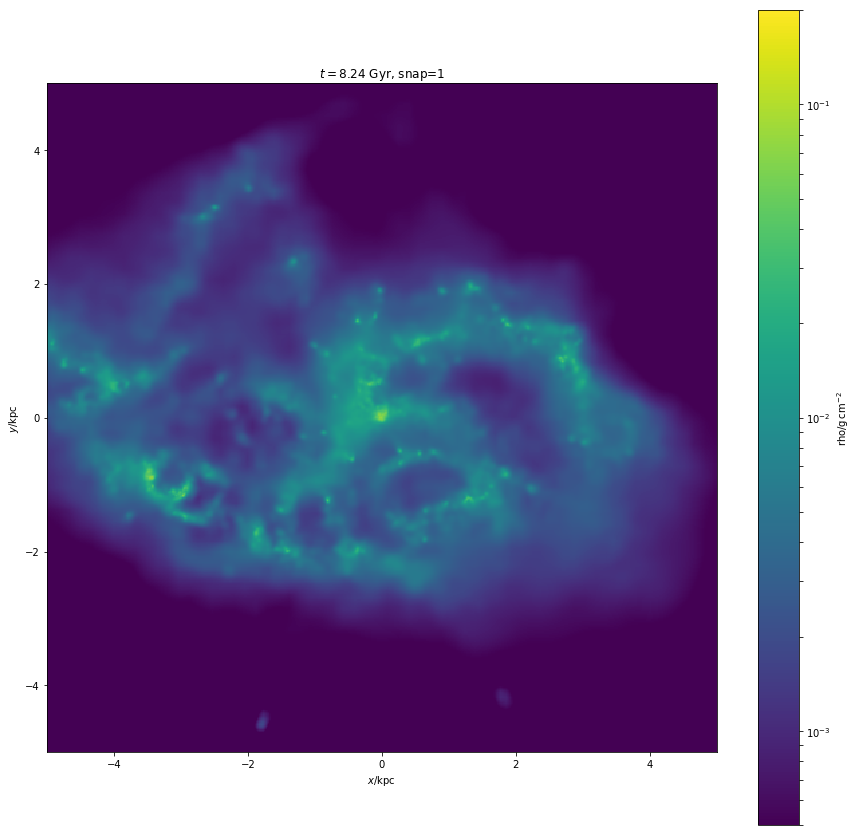

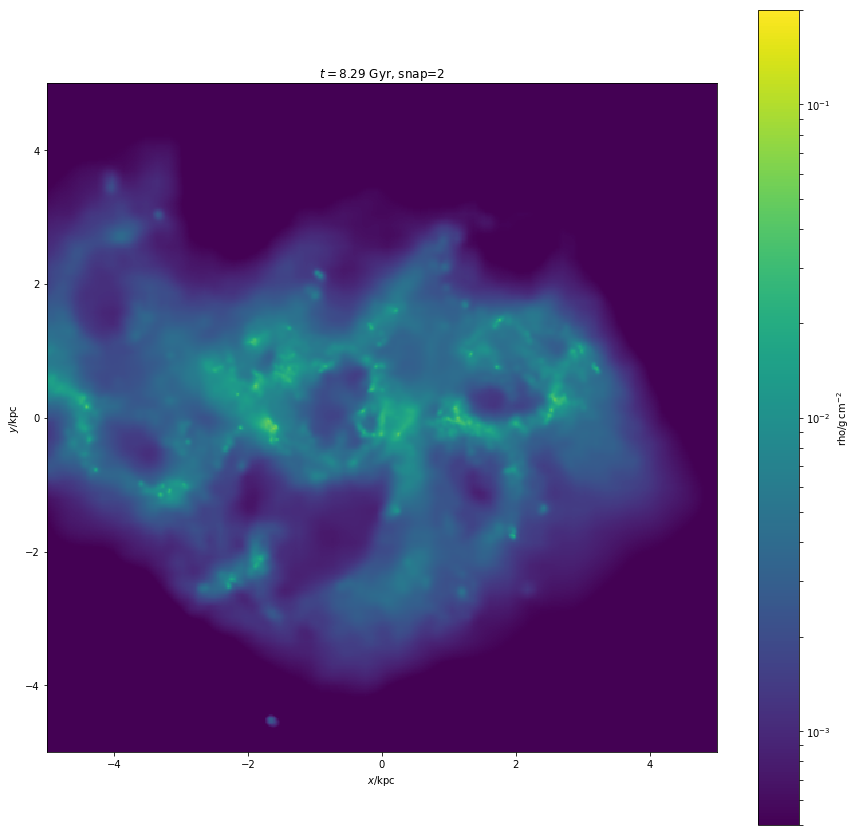

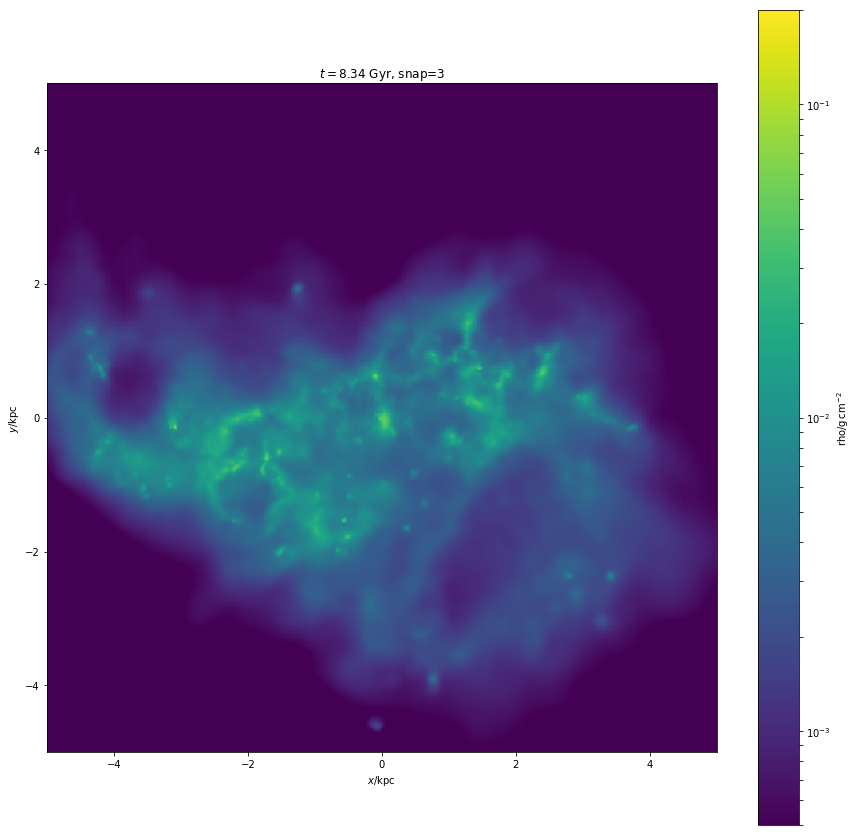

In [11]:
for sim in snap_list[0:3]:
    snap = int(sim.filename[-4:])
    fig, ax = plt.subplots(figsize=(15,15))
    filename = os.path.join(folder,"gas_image_{}_{}.png".format(SIMNUMBER,snap))
    title = '$t={:5.2f}$ Gyr, snap={}'.format(sim.properties['time'].in_units("Gyr"), snap)
    gas_image(sim, width=width, vmin=vmin, vmax=vmax, resolution=resolution, title=title, filename=filename);
    print("Saved", filename)